This notebook contains an example for how to use the `taxbrain` python package

In [1]:
from taxbrain import TaxBrain, differences_plot, distribution_plot

In [2]:
reform_url = "https://raw.githubusercontent.com/PSLmodels/Tax-Calculator/master/taxcalc/reforms/Larson2019.json"
start_year = 2021
end_year = 2030

# Static Reform

After importing the `TaxBrain` class from the `taxbrain` package, we initiate an instance of the class by specifying the start and end year of the anlaysis, which microdata to use, and a policy reform. Additional arguments can be used to specify econoimc assumptions and individual behavioral elasticites.

Once the class has been initiated, the `run()` method will handle executing each model

In [3]:
tb_static = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url)
tb_static.run()

Once the calculators have been run, you can produce a number of tables, including a weighted total of a given variable each year under both current law and the user reform.

In [4]:
print("Combined Tax Liability Over the Budget Window")
tb_static.weighted_totals("combined")

Combined Tax Liability Over the Budget Window


,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,2.571828e+12,2.715400e+12,2.846491e+12,2.990706e+12,3.151490e+12,3.537569e+12,3.728943e+12,3.912164e+12,4.090795e+12,4.268168e+12
Reform,2.624536e+12,2.781239e+12,2.926065e+12,3.085554e+12,3.263417e+12,3.659957e+12,3.871454e+12,4.075211e+12,4.263201e+12,4.449451e+12
Difference,5.270752e+10,6.583917e+10,7.957361e+10,9.484773e+10,1.119264e+11,1.223880e+11,1.425109e+11,1.630469e+11,1.724056e+11,1.812827e+11


If you are interested in a detailed look on the reform's effect, you can produce a differences table for a given year.

In [5]:
print("Differences Table")
tb_static.differences_table(start_year, "weighted_deciles", "combined")

Differences Table


,count,tax_cut,perc_cut,tax_inc,perc_inc,mean,tot_change,share_of_change,ubi,benefit_cost_total,benefit_value_total,pc_aftertaxinc
0-10n,0.115333,0.000000,0.000000,0.028253,24.497135,5.471870,0.000631,0.001197,0.0,0.0,0.0,0.003868
0-10z,8.506045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
0-10p,12.191270,0.000000,0.000000,5.522697,45.300423,3.005029,0.036635,0.069506,0.0,0.0,0.0,-0.046035
10-20,20.814365,0.000000,0.000000,15.202324,73.037656,15.208011,0.316545,0.600569,0.0,0.0,0.0,-0.060796
20-30,20.813097,0.003684,0.017700,14.892930,71.555567,28.382182,0.590721,1.120753,0.0,0.0,0.0,-0.060109
30-40,20.812646,0.107658,0.517273,12.245201,58.835387,30.982088,0.644819,1.223391,0.0,0.0,0.0,-0.048941
40-50,20.814848,0.393846,1.892140,12.605872,60.561919,33.336457,0.693893,1.316498,0.0,0.0,0.0,-0.034722
50-60,20.813603,1.661413,7.982344,13.266555,63.739831,15.158956,0.315512,0.598610,0.0,0.0,0.0,0.020912
60-70,20.812398,3.244058,15.587141,12.647319,60.768196,-82.475428,-1.716511,-3.256673,0.0,0.0,0.0,0.181236
70-80,20.812279,4.142464,19.903941,12.784183,61.426154,-209.261379,-4.355206,-8.262969,0.0,0.0,0.0,0.314308


TaxBrain comes with two (and counting) built in plots as well

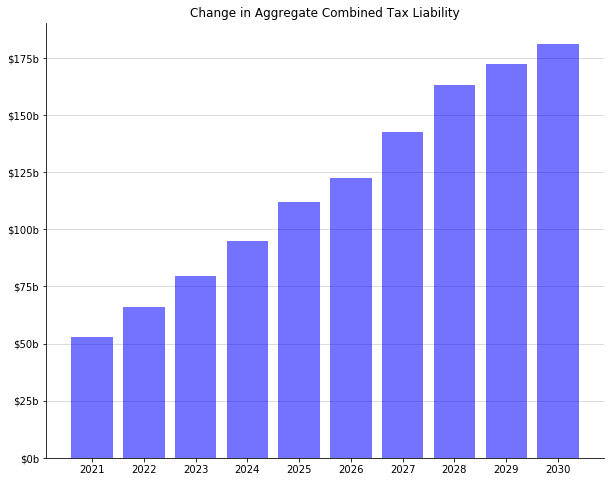

In [6]:
differences_plot(tb_static, 'combined', figsize=(10, 8));

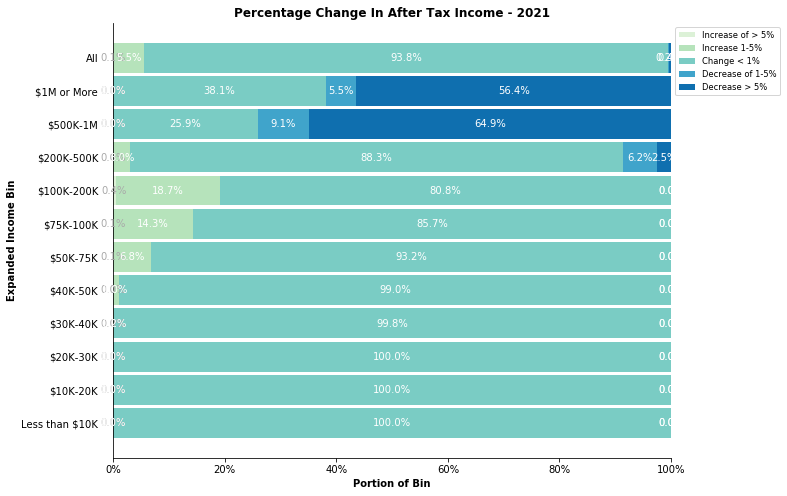

In [7]:
distribution_plot(tb_static, 2021, figsize=(10, 8));

You can run a partial-equlibrium dynamic simulation by initiating the TaxBrian instance exactly as you would for the static reform, but with your behavioral assumptions specified

In [8]:
tb_dynamic = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url,
                      behavior={"sub": 0.25})
tb_dynamic.run()

Once that finishes running, we can produce the same weighted total table as we did with the static run.

In [9]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")

Partial Equilibrium - Combined Tax Liability


,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Base,2.571828e+12,2.715400e+12,2.846491e+12,2.990706e+12,3.151490e+12,3.537569e+12,3.728943e+12,3.912164e+12,4.090795e+12,4.268168e+12
Reform,2.601925e+12,2.756096e+12,2.898242e+12,3.054837e+12,3.229669e+12,3.618923e+12,3.828904e+12,4.026075e+12,4.211117e+12,4.395952e+12
Difference,3.009671e+10,4.069630e+10,5.175027e+10,6.413062e+10,7.817885e+10,8.135412e+10,9.996079e+10,1.139105e+11,1.203217e+11,1.277839e+11


Or we can produce a distribution table to see details on the effects of the reform.

In [10]:
print("Distribution Table")
tb_dynamic.distribution_table(start_year, "weighted_deciles", "expanded_income", "reform")

Distribution Table


,count,c00100,count_StandardDed,standard,count_ItemDed,c04470,c04600,c04800,taxbc,c62100,...,othertaxes,refund,iitax,payrolltax,combined,ubi,benefit_cost_total,benefit_value_total,expanded_income,aftertax_income
0-10n,0.115333,-9.047595,0.115333,1.885216,0.000000,0.000000,0.0,0.000000,0.000000,-9.047595,...,0.000000,0.000000,0.000000,0.049084,0.049084,0.0,0.611626,0.611626,-8.430574e+00,-8.479658e+00
0-10z,8.506734,-0.086591,8.506734,121.959361,0.000000,0.000000,0.0,0.000000,0.000000,-0.086591,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-6.441833e-08,-6.441833e-08
0-10p,12.190350,23.835225,12.144855,178.016958,0.045495,0.116874,0.0,0.156897,0.009477,23.734567,...,0.000000,0.690110,-0.669324,2.839255,2.169931,0.0,17.591287,17.591287,4.252581e+01,4.035588e+01
10-20,20.814011,177.819214,20.491224,289.192224,0.322101,4.482440,0.0,13.335962,1.207506,173.742984,...,0.000000,9.353213,-8.131132,24.561933,16.430801,0.0,89.166538,89.166538,2.804744e+02,2.640436e+02
20-30,20.813074,318.530254,19.727546,305.886750,1.085527,17.711842,0.0,107.303495,10.628916,302.825447,...,0.000000,16.086544,-6.282383,45.921631,39.639249,0.0,196.784931,196.784931,5.424965e+02,5.028573e+02
30-40,20.813979,369.826021,19.639097,345.024423,1.174882,20.363631,0.0,170.540148,17.835818,352.426171,...,0.000000,13.746650,1.639923,52.621174,54.261097,0.0,337.505102,337.505102,7.416037e+02,6.873426e+02
40-50,20.811791,482.550223,19.397962,349.136484,1.413829,26.956624,0.0,245.348918,26.328386,459.980551,...,0.000000,13.507941,8.096689,65.973792,74.070482,0.0,402.260964,402.260964,9.321310e+02,8.580605e+02
50-60,20.814918,661.630936,18.599439,347.051639,2.215478,42.562276,0.0,367.465071,40.422590,627.504319,...,0.000000,14.123708,18.526753,89.173047,107.699799,0.0,443.722857,443.722857,1.170630e+03,1.062930e+03
60-70,20.813189,857.110982,18.099519,366.018828,2.713669,53.607318,0.0,523.426343,62.638891,815.836175,...,0.000000,14.958205,36.053421,113.998771,150.052193,0.0,543.781063,543.781063,1.484207e+03,1.334155e+03
70-80,20.814527,1185.103833,17.122154,377.917252,3.692372,81.886507,0.0,795.203166,101.814527,1124.371659,...,0.000000,12.562504,72.157058,154.279338,226.436396,0.0,633.042501,633.042501,1.925422e+03,1.698985e+03


# Dynamic Reform with Corporate Income Tax Incidence

Now we simulate a dynamic revenue estimate while accounting for the incidence of a corporate income tax change.

In [ ]:
# Corporate revenue estimate
corp_rev = [5_000_000_000] * (end_year - start_year)
incidence_assumptions = {
    "Incidence": {  # long-run incidence of corporate tax
        "Labor share": 0.5,
        "Shareholder share": 0.4,
        "All capital share": 0.1,
    },
    "Long run years": 10,  # number of years to reach long-run incidence
}

In [ ]:
tb_dynamic = TaxBrain(start_year, end_year, use_cps=True, reform=reform_url,
                      behavior={"sub": 0.25},
                      corp_revenue=corp_rev,
                      corp_incidence_assumptions=incidence_assumptions)
tb_dynamic.run()

In [ ]:
print("Partial Equilibrium - Combined Tax Liability")
tb_dynamic.weighted_totals("combined")